# Analytical and numerical calculation of the order of approximation of a derivative calculated through finite differences (optional).

## 1 – The numerical test of the high-order formula

Implement the finite difference formula given by the first term on the right of Eq (5) in the [wiki](https://github.com/AST-Course/AST5110/wiki/Discretization)  into the program you developed for Exercise 1a and test if you get an approximation to the first derivative with an error that converges to zero like $(\Delta x)^4$.

Compare the 2nd-order and 4th-order error curves. Which error do you get in either case for 128 intervals? For 512 intervals? For 1024 intervals?

## 2 - Precission

Try for more than $10^6$ grid points. What do you see? What happens if you try for a lower or higher floating number? Numpy uses float 64 as default. Instead, use `np.float32` and `np.float128`. Explain the error slopes. 

In [25]:
import numpy as np
import matplotlib.pyplot as plt 
from nm_lib import nm_lib as nm

def h(x): 
    # Solves h as a function of x 
    return np.cos(np.pi*(x-1) / 2) * np.exp(-((x-3) / 2.5)**2)

def hp_calc(x): 
    # Analytical derivative
    return np.exp(-0.16*(-3+x)**2)  *(1.5708*np.cos((np.pi*x)/2) - (-0.96 + 0.32*x) * np.sin((np.pi*x)/2))

def calc_error(x): 
    hp_calc_small = hp_calc(x[:-1] + (x[1]-x[0])/2)
    hp = nm.deriv_dnw(x, h(x))

    error = np.max(np.abs(hp_calc_small - hp))
    dxs = x[1] - x[0]

    return error, dxs

In [50]:
# 32 
nint =  [1e6, 2e6, 3e6, 4e6, 7e6]
error_list_32 = []
x0=np.float32(-4.0)
xf=np.float32(10.0)

for n in nint: 
    nump = n + 1
    xx = np.arange(nump)/(nump-1.0) * (xf-x0) + x0

    error_list_32.append(np.float32(calc_error(xx)[0]))

# 64 
nint =  [1e6, 2e6, 3e6, 4e6, 7e6]
error_list_64 = []
x0 = (-4.0)
xf = (10.0)

for n in nint: 
    nump = n + 1
    xx = np.arange(nump)/(nump-1.0) * (xf-x0) + x0

    error_list_64.append(calc_error(xx)[0])

# 128 
nint =  [1e6, 2e6, 3e6, 4e6, 7e6]
error_list_128 = []
x0=np.float128(-4.0)
xf=np.float128(10.0)

for n in nint: 
    nump = n + 1
    xx = np.arange(nump)/(nump-np.float128(1.0)) * (xf-x0) + x0

    error_list_128.append(np.float128(calc_error(xx)[0]))

In [51]:
p_32  = np.poly1d(np.polyfit(np.log10(nint[:-3]), np.log10(error_list_32[:-3]), deg=1))
p_64  = np.poly1d(np.polyfit(np.log10(nint[:-3]), np.log10(error_list_64[:-3]), deg=1))
# p_128 = np.poly1d(np.polyfit(np.log10(nint[:-3]), np.log10(error_list_128[:-3]), deg=1))

# print(f"Error of quadratic dependence: {np.abs(np.sum(error_list_32)/len(error_list_32) - p_32.coef[0]):.1e}")
# print(f"Error of quadratic dependence: {np.abs(np.sum(error_list_64)/len(error_list_64) - p_64.coef[0]):.1e}")
# print(f"Error of quadratic dependence: {np.abs(np.sum(error_list_128)/len(error_list_128) - p_128.coef[0]):.1e}")

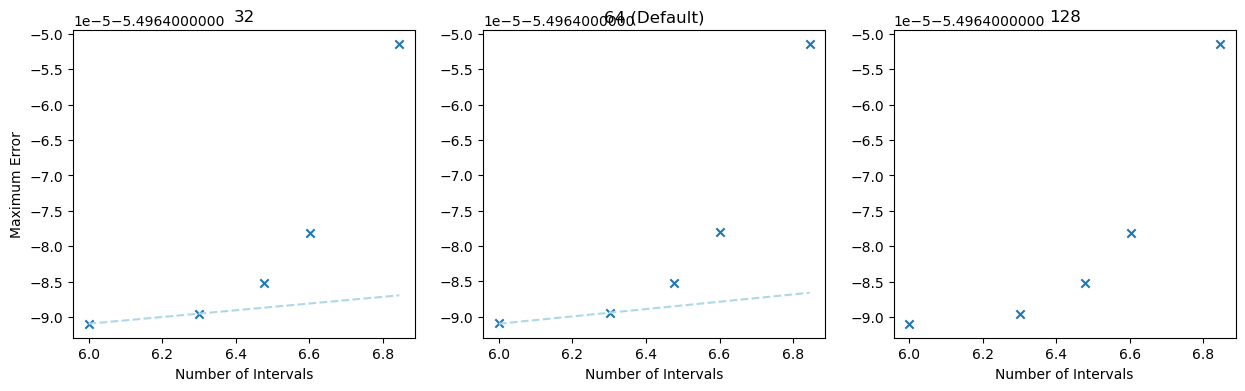

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

ax1.scatter(np.log10(nint), np.log10(np.float32(error_list_32)), marker='x')
ax1.plot(np.log10(nint), p_32(np.log10(nint)), color='lightblue', linestyle='--')
ax1.set_xlabel("Number of Intervals"); ax1.set_ylabel("Maximum Error")
ax1.title.set_text(f'32')

ax2.scatter(np.log10(nint), np.log10(np.float32(error_list_64)), marker='x')
ax2.plot(np.log10(nint), p_64(np.log10(nint)), color='lightblue', linestyle='--')
ax2.set_xlabel("Number of Intervals")
ax2.title.set_text(f'64 (Default)')

ax3.scatter(np.log10(nint), np.log10(np.float32(error_list_128)), marker='x')
ax3.set_xlabel("Number of Intervals")
ax3.title.set_text(f'128')

There is no difference as I can see. 